#Homework Assignment 3 
#BA 875 Operations and Supply Chain Analytics 

Submitted by Prateek Naharia 
nahariap@bu.edu

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
! pip install "statsmodels==0.12.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 57.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.12.0-cp39-cp39-linux_x86_64.whl size=22521087 sha256=b7259ef3fe584cfdf22767880a9f74d446b2dbe298d6ac70d0fe9a6da50d7a33
  Stored in directory: /root/.cache/pip/wheels/34/a7/1c/cfdeca56e5f57f32b1fec9ea605bcb5e094f47724fab22d644
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 require

In [123]:
import pandas as pd
import numpy as np
grocery_url = 'https://raw.githubusercontent.com/nahariaprateek/SuppyChain_Analytics/main/datasets_course/grocery_data.csv'
booking_url = 'https://raw.githubusercontent.com/nahariaprateek/SuppyChain_Analytics/main/datasets_course/booking_data.csv'
dfgrocery = pd.read_csv(grocery_url)
dfbooking = pd.read_csv(booking_url)
#/content/grocery_data.xlsx
#dfgrocery = pd.read_excel("/content/grocery_data.xlsx")
#dfbooking = pd.read_excel("/content/booking_data.xlsx")


##Part I: Demand Unconstraining: Physical products with limited inventory
Dataset: grocery_data

You are given the same dataset of hourly sales rates of Pain de Boulogne shown in class and in the Python exercise (this data comes from Table 5.3 of textbook).

Demand uncensoring for this dataset was applied using the proportional method in the Python exercise. 

Now, your assignment is to instead implement the other two methods, i.e., the DES and Averaging methods to arrive at the total estimated unconstrained sales values

### Initial Steps

In [71]:
dfgrocery.head()

,Unnamed: 0,Hourly interval,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Total
0,Day,1,2,3,4,5,6,7,8,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,NaN
1,1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0


In [72]:
dfgrocery.info()
dfgrocery.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21 non-null     object 
 1   Hourly interval  21 non-null     int64  
 2   Unnamed: 2       21 non-null     int64  
 3   Unnamed: 3       21 non-null     int64  
 4   Unnamed: 4       21 non-null     int64  
 5   Unnamed: 5       21 non-null     int64  
 6   Unnamed: 6       21 non-null     int64  
 7   Unnamed: 7       21 non-null     int64  
 8   Unnamed: 8       21 non-null     int64  
 9   Unnamed: 9       20 non-null     float64
 10  Unnamed: 10      20 non-null     float64
 11  Unnamed: 11      17 non-null     float64
 12  Unnamed: 12      17 non-null     float64
 13  Unnamed: 13      15 non-null     float64
 14  Unnamed: 14      15 non-null     float64
 15  Unnamed: 15      11 non-null     float64
 16  Unnamed: 16      8 non-null      float64
 17  Total            2

,Unnamed: 0,Hourly interval,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Total
0,Day,1,2,3,4,5,6,7,8,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,NaN
1,1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0
5,5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
6,6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,31.0
7,7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,40.0
8,8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20.0
9,9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,31.0


In [102]:
dfgrocery = dfgrocery.iloc[1:,1:]
dfgrocery.head(25)

,Hourly interval,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Total
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,31.0
7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,40.0
8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20.0
9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,31.0
10,2,6,6,3,4,2,4,2,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0


In [103]:
dfgrocery.columns = np.arange(1,18)
dfgrocery = dfgrocery.add_prefix("hour")
dfgrocery.head(25)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,hour17
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,31.0
7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,40.0
8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20.0
9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,31.0
10,2,6,6,3,4,2,4,2,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0


In [104]:
dfgrocery = dfgrocery.rename(columns={'hour17' : 'total'})
#dfgrocery = dfgrocery.reset_index(drop=True)
dfgrocery

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,31.0
7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,40.0
8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20.0
9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,31.0
10,2,6,6,3,4,2,4,2,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0


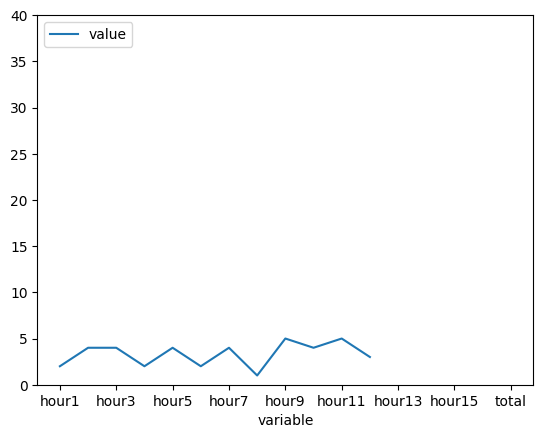

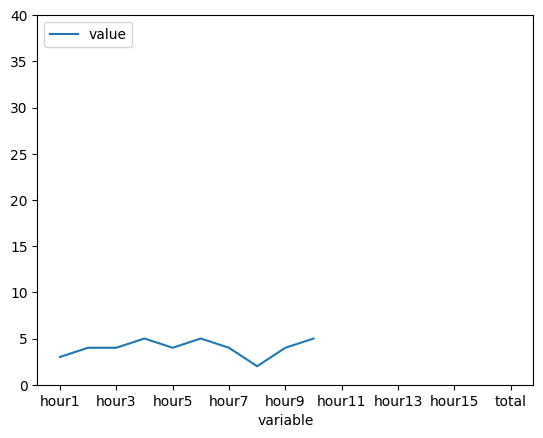

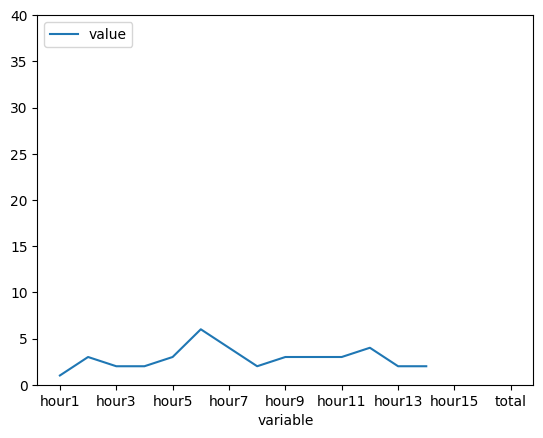

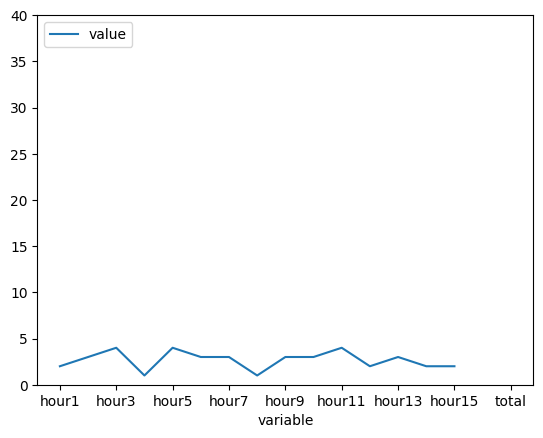

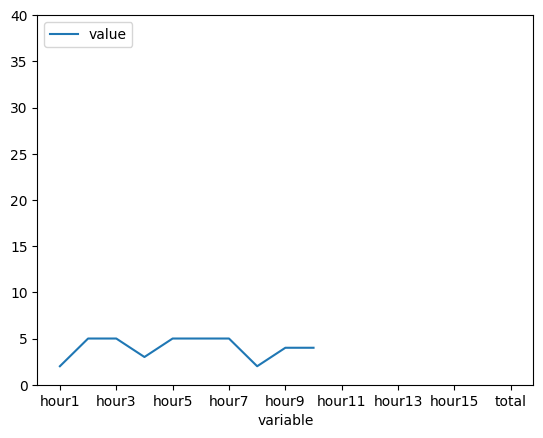

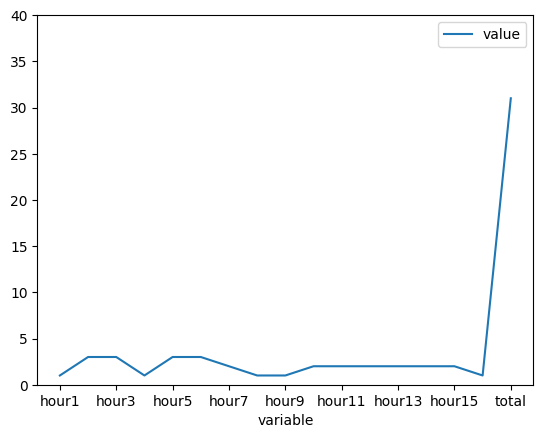

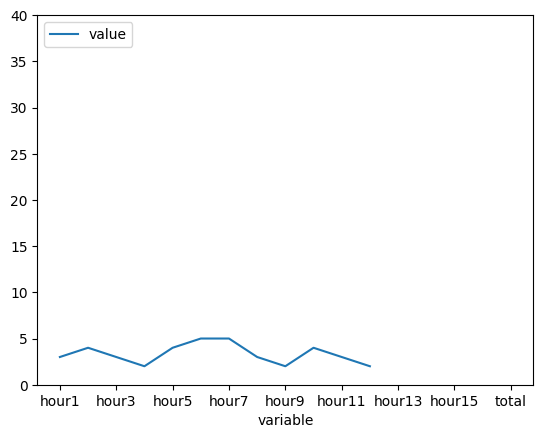

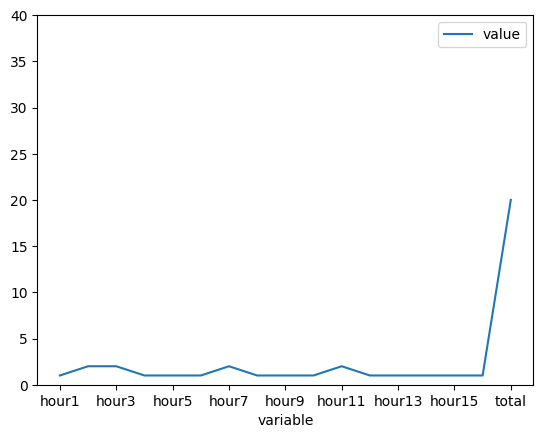

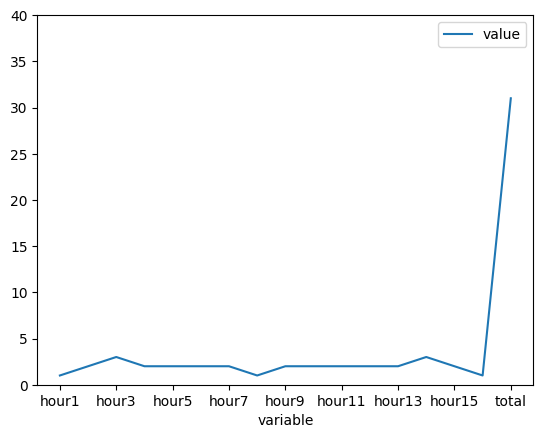

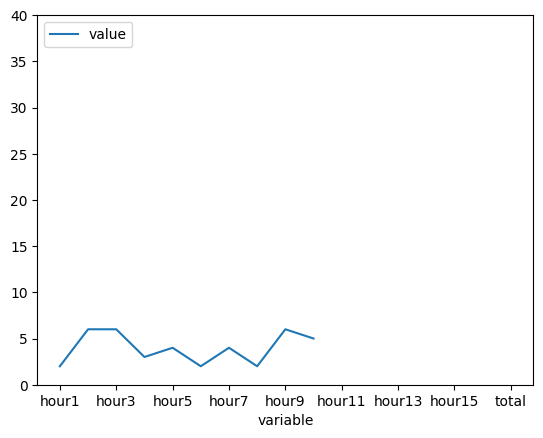

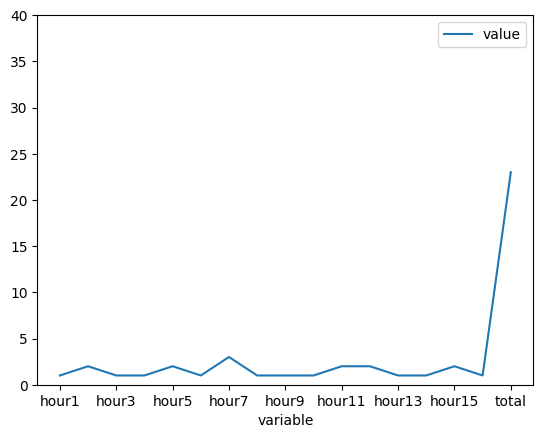

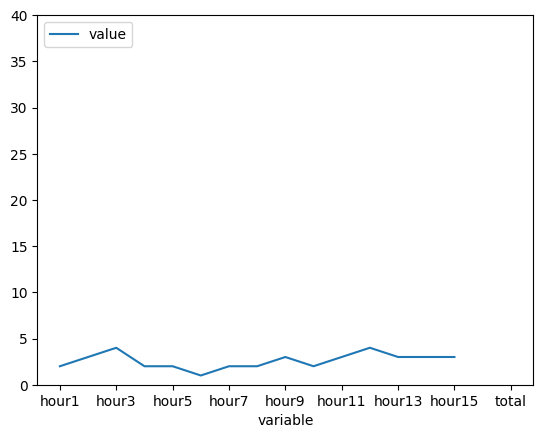

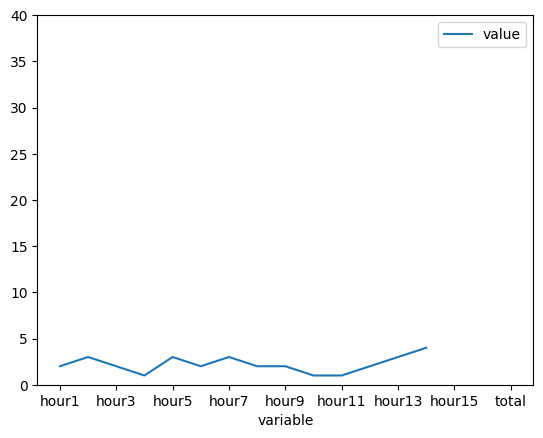

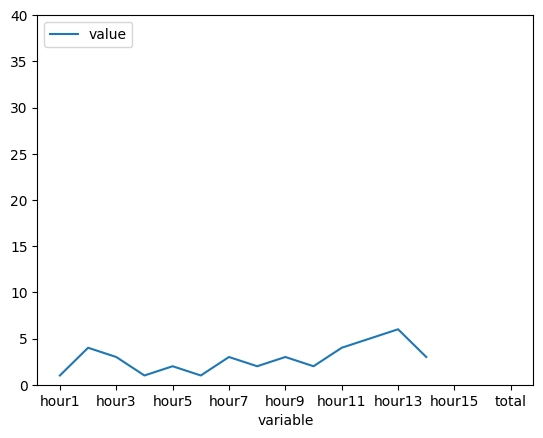

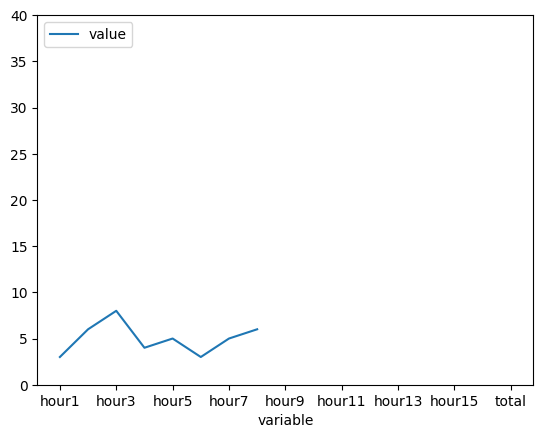

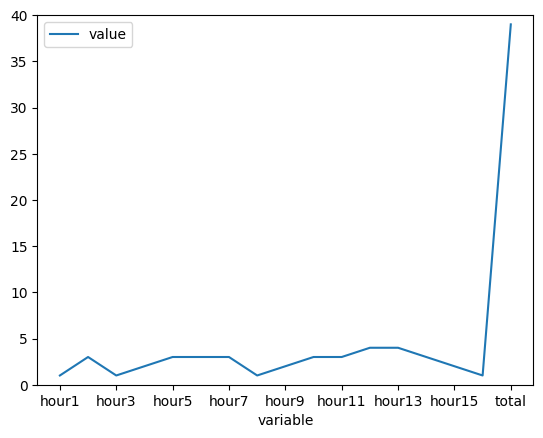

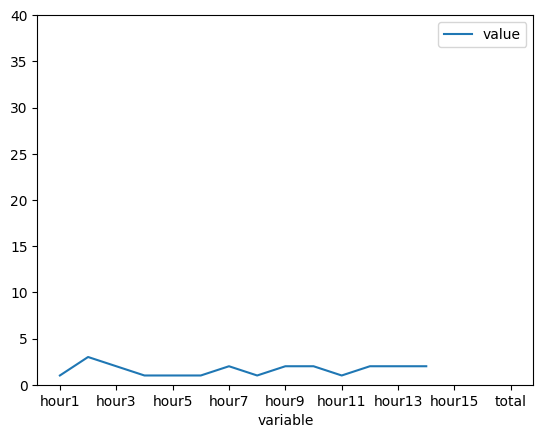

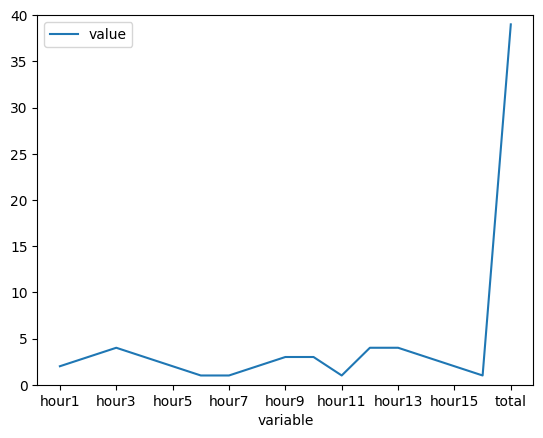

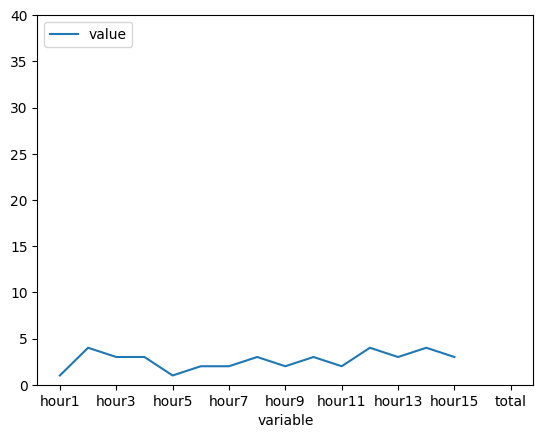

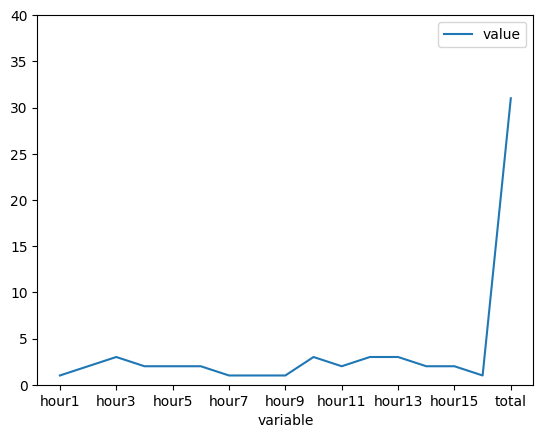

In [ ]:
# Eyeball the data (^_^)
dfgrocery = dfgrocery.reset_index()
dfgrocery = pd.melt(dfgrocery, id_vars=['index'])
grocery_plot = dfgrocery.groupby('index').plot(x='variable', y='value', kind='line', ylim=(0,40))

In [41]:
dfgrocery.head()

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0


In [105]:
df = dfgrocery.copy()
dfgrocery['censored'] = dfgrocery.isna().any(axis=1)
dfgrocery.head()

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total,censored
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0,True
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0,True
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0,True
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True


###a. Double Exponential Smoothing (DES) estimations

*  Execute and report the same steps as seen in the companion code for the DES method on the Hyatt booking data
*  Try (alpha,beta) = 0.1 to 1 using 0.1 increments and forecast
* Assume a burn-in period of 3 hours


* Step 1: Tease out the constrained booking curves
* Step 2: apply DES to the constrained curves; find best alpha and beta for each; predict
* Step 3: summarize total estimated demand for all booking curves as a column onto the original dataset

In [106]:
des_grocery = dfgrocery.copy()
des_grocery = dfgrocery.cumsum(axis=1)
des_grocery.head(10)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total,censored
1,2,6,10,12,16,18,22,23,28.0,32.0,37.0,40.0,NaN,NaN,NaN,NaN,80.0,81.0
2,3,7,11,16,20,25,29,31,35.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,81.0
3,1,4,6,8,11,17,21,23,26.0,29.0,32.0,36.0,38.0,40.0,NaN,NaN,80.0,81.0
4,2,5,9,10,14,17,20,21,24.0,27.0,31.0,33.0,36.0,38.0,40.0,NaN,80.0,81.0
5,2,7,12,15,20,25,30,32,36.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,81.0
6,1,4,7,8,11,14,16,17,18.0,20.0,22.0,24.0,26.0,28.0,30.0,31.0,62.0,62.0
7,3,7,10,12,16,21,26,29,31.0,35.0,38.0,40.0,NaN,NaN,NaN,NaN,80.0,81.0
8,1,3,5,6,7,8,10,11,12.0,13.0,15.0,16.0,17.0,18.0,19.0,20.0,40.0,40.0
9,1,3,6,8,10,12,14,15,17.0,19.0,21.0,23.0,25.0,28.0,30.0,31.0,62.0,62.0
10,2,8,14,17,21,23,27,29,35.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,81.0


In [109]:
grocery_des = des_grocery.copy()
grocery_count = grocery_des.count(axis=1)

for r in range(1, 21):
    if grocery_des.loc[r, 'censored'] and not np.isnan(grocery_des.iloc[r-1, grocery_count[r]-3]):
        grocery_des.iloc[r-1, grocery_count[r]-3] = np.nan
        
grocery_des

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total,censored
1,2,6,10,12,16,18,22,23,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN,80.0,81.0
2,3,7,11,16,20,25,29,31,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,81.0
3,1,4,6,8,11,17,21,23,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN,80.0,81.0
4,2,5,9,10,14,17,20,21,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN,80.0,81.0
5,2,7,12,15,20,25,30,32,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,81.0
6,1,4,7,8,11,14,16,17,18.0,20.0,22.0,24.0,26.0,28.0,30.0,NaN,62.0,62.0
7,3,7,10,12,16,21,26,29,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN,80.0,81.0
8,1,3,5,6,7,8,10,11,12.0,13.0,15.0,16.0,17.0,18.0,19.0,NaN,40.0,40.0
9,1,3,6,8,10,12,14,15,17.0,19.0,21.0,23.0,25.0,28.0,30.0,NaN,62.0,62.0
10,2,8,14,17,21,23,27,29,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,81.0


In [111]:
des_grocery = grocery_des.drop(['censored', 'total'], axis=1)
des_grocery.head(22)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2,6,10,12,16,18,22,23,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN
2,3,7,11,16,20,25,29,31,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,6,8,11,17,21,23,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN
4,2,5,9,10,14,17,20,21,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN
5,2,7,12,15,20,25,30,32,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,4,7,8,11,14,16,17,18.0,20.0,22.0,24.0,26.0,28.0,30.0,NaN
7,3,7,10,12,16,21,26,29,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN
8,1,3,5,6,7,8,10,11,12.0,13.0,15.0,16.0,17.0,18.0,19.0,NaN
9,1,3,6,8,10,12,14,15,17.0,19.0,21.0,23.0,25.0,28.0,30.0,NaN
10,2,8,14,17,21,23,27,29,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
rows_with_nan = des_grocery.isnull().any(axis=1)
filtered_df = des_grocery[rows_with_nan]
desgrocery = filtered_df.copy()
desgrocery.head(19)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2,6,10,12,16,18,22,23,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN
2,3,7,11,16,20,25,29,31,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,6,8,11,17,21,23,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN
4,2,5,9,10,14,17,20,21,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN
5,2,7,12,15,20,25,30,32,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,4,7,8,11,14,16,17,18.0,20.0,22.0,24.0,26.0,28.0,30.0,NaN
7,3,7,10,12,16,21,26,29,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN
8,1,3,5,6,7,8,10,11,12.0,13.0,15.0,16.0,17.0,18.0,19.0,NaN
9,1,3,6,8,10,12,14,15,17.0,19.0,21.0,23.0,25.0,28.0,30.0,NaN
10,2,8,14,17,21,23,27,29,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DES Function 

In [113]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
from itertools import product

In [114]:
def DESMSE(alpha, beta, series):
    series = series.astype(float)
    return mean_squared_error(
        series[3:],
        ExponentialSmoothing(
            series, trend="add", initialization_method='estimated'
        ).fit(smoothing_level=alpha, smoothing_trend=beta).predict(3, series.size - 1)
    )

In [115]:
# the function below allows you to construct a dataframe of alpha-beta combinations
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [116]:
# define the alpha and beta values to try as a dictionary
dictionary = {'alpha': np.arange(0.1, 1.1, 0.1), 
              'beta': np.arange(0.1, 1.1, 0.1)}

In [117]:
# predict curve by curve
for row_number in np.arange(0,desgrocery.shape[0]):
    temp = desgrocery.iloc[row_number,:].dropna().reset_index(drop=True)
    temp = temp.astype(float)
    des_results = expand_grid(dictionary)
    des_results["mse"] = np.repeat(0,len(des_results))
    for alpha in np.arange(0.1, 1.1, 0.1):
        for beta in np.arange(0.1, 1.1, 0.1):
           des_results.loc[(des_results["alpha"] == alpha) & (des_results["beta"] == beta),"mse"] = DESMSE(alpha,beta,temp)    
    des_results = des_results.sort_values("mse")
    predicted_daily_arrival = ExponentialSmoothing(temp,trend="add", initialization_method='estimated'). \
                                         fit(smoothing_level = des_results.iloc[0,0],
                                             smoothing_trend = des_results.iloc[0,1]). \
                                         forecast(16-temp.size)
                               
    # cumsum the daily arrival and add back to the last value that's not nan
    desgrocery.iloc[row_number,temp.size:] = predicted_daily_arrival.cumsum() + desgrocery.iloc[row_number,temp.size-1] 


In [118]:
des_results

,alpha,beta,mse
90,1.0,0.1,0.550549
91,1.0,0.2,0.578404
92,1.0,0.3,0.594925
80,0.9,0.1,0.598673
93,1.0,0.4,0.602684
...,...,...,...
28,0.3,0.9,1.805332
16,0.2,0.7,1.815075
17,0.2,0.8,1.857501
18,0.2,0.9,1.895679


In [119]:
desgrocery.head(13)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2,6,10,12,16,18,22,23,28.0,32.0,37.0,75.384738,117.050003,161.995794,210.222111,261.728954
2,3,7,11,16,20,25,29,31,35.0,75.103386,119.290341,167.560864,219.914955,276.352616,336.873844,401.478642
3,1,4,6,8,11,17,21,23,26.0,29.0,32.0,36.0,38.0,79.89987,125.016189,173.348958
4,2,5,9,10,14,17,20,21,24.0,27.0,31.0,33.0,36.0,38.0,79.255034,123.276073
5,2,7,12,15,20,25,30,32,36.0,77.32235,122.927983,172.816899,226.9891,285.444583,348.18335,415.205401
6,1,4,7,8,11,14,16,17,18.0,20.0,22.0,24.0,26.0,28.0,30.0,62.03001
7,3,7,10,12,16,21,26,29,31.0,35.0,38.0,80.232915,126.049153,175.448716,228.431602,284.997813
8,1,3,5,6,7,8,10,11,12.0,13.0,15.0,16.0,17.0,18.0,19.0,39.803257
9,1,3,6,8,10,12,14,15,17.0,19.0,21.0,23.0,25.0,28.0,30.0,62.090017
10,2,8,14,17,21,23,27,29,35.0,73.479262,115.73782,161.775674,211.592825,265.189272,322.565016,383.720056


In [120]:
desgrocery['des'] = desgrocery['hour16'] 

In [121]:
dfgrocery.loc[dfgrocery.censored, 'des'] = desgrocery['hour16'].fillna(0).round()

In [122]:
dfgrocery.head(20)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total,censored,des
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0,True,262.0
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True,401.0
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0,True,173.0
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0,True,123.0
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True,415.0
6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,31.0,False,NaN
7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,40.0,True,285.0
8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20.0,False,NaN
9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,31.0,False,NaN
10,2,6,6,3,4,2,4,2,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True,384.0


### b. Averaging method estimations
* Execute and report the same steps as seen in the companion code for the Averaging method on the Hyatt booking data
* Since there is not a specific booking limit (as in the case of the booking data), you will be handling the last hour before censoring occurred each day when starting your prediction

* Step 1: slice booking curve into segments (in hourly increments)
* Step 2: Calculate unconstrained arrivals 
* Step 3: Repeat algorithmic steps until you have reached final demand and 
report as a column onto the original dataset

In [263]:
average_grocery = dfgrocery.drop(['total','des','censored'],axis=1)

In [264]:
average_grocery[average_grocery.isna()] = 0
average_grocery = average_grocery.cumsum(axis=1)
average_grocery.columns = np.arange(1,17)
average_grocery['censored'] = dfgrocery['censored']
average_grocery = average_grocery.reset_index()
average_grocery.head()

,index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,censored
0,1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,40.0,40.0,40.0,40.0,40.0,True
1,2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,True
2,3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,40.0,40.0,40.0,True
3,4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,40.0,40.0,True
4,5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,True


In [265]:
df_avg_grocery = pd.melt(average_grocery.reset_index(),id_vars='index',var_name = 'day',value_name='demand')
df_avg_grocery = df_avg_grocery.sort_values(by=['index','day'])
df_avg_grocery.head(20)


,index,day,demand
20,1,1,2.0
40,1,2,6.0
60,1,3,10.0
80,1,4,12.0
100,1,5,16.0
120,1,6,18.0
140,1,7,22.0
160,1,8,23.0
180,1,9,28.0
200,1,10,32.0


In [266]:
df_avg_grocery['demand'] = pd.to_numeric(df_avg_grocery['demand'], errors='coerce')
df_avg_grocery['sales_daily'] = df_avg_grocery.groupby('index').demand.cumsum()
df_avg_grocery['day'] = df_avg_grocery['day'].fillna('NaN').astype(str)
#df_avg_grocery['censored'] = df_avg_grocery['sales_daily'] == 60
df_avg_grocery = df_avg_grocery[~df_avg_grocery['day'].str.contains('level_|NaN')]
df_avg_grocery.head(28)

,index,day,demand,sales_daily
20,1,1,2.0,2.0
40,1,2,6.0,8.0
60,1,3,10.0,18.0
80,1,4,12.0,30.0
100,1,5,16.0,46.0
120,1,6,18.0,64.0
140,1,7,22.0,86.0
160,1,8,23.0,109.0
180,1,9,28.0,137.0
200,1,10,32.0,169.0


In [267]:
average_df = df_avg_grocery.groupby('index')[['demand', 'sales_daily','day']].mean().reset_index()
average_df.rename(columns={'demand': 'average_demand', 'sales_daily': 'average_sales_daily','day':'day'}, inplace=True)
average_df['day'] = average_df['index']
average_df.head(20)

<ipython-input-267-a7c2f3b8d5c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_df = df_avg_grocery.groupby('index')[['demand', 'sales_daily','day']].mean().reset_index()


,index,average_demand,average_sales_daily,day
0,1,23.941176,171.294118,1
1,2,26.941176,203.352941,2
2,3,21.941176,149.882353,3
3,4,21.647059,152.058824,4
4,5,27.058824,204.176471,5
5,6,16.294118,115.823529,6
6,7,25.235294,184.882353,7
7,8,10.647059,76.352941,8
8,9,15.470588,107.294118,9
9,10,26.882353,203.647059,10


In [270]:
df = df_avg_grocery[df_avg_grocery.censored==False].groupby('day').demand.mean()
df = df.reset_index().rename(columns = {'index' : "day", 'demand' : 'daily_demand_avg'})
df.head()

,day,daily_demand_avg
0,1,1.65
1,10,25.95
2,11,27.95
3,12,30.25
4,13,32.20


In [271]:
data = pd.merge(average_grocery,average_df,how='left',on='index')
#data = data.drop('index', axis=1)
data.head(20)

,index,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,censored,average_demand,average_sales_daily,day
0,1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,...,37.0,40.0,40.0,40.0,40.0,40.0,True,23.941176,171.294118,1
1,2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,...,40.0,40.0,40.0,40.0,40.0,40.0,True,26.941176,203.352941,2
2,3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,...,32.0,36.0,38.0,40.0,40.0,40.0,True,21.941176,149.882353,3
3,4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,...,31.0,33.0,36.0,38.0,40.0,40.0,True,21.647059,152.058824,4
4,5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,...,40.0,40.0,40.0,40.0,40.0,40.0,True,27.058824,204.176471,5
5,6,1.0,4.0,7.0,8.0,11.0,14.0,16.0,17.0,18.0,...,22.0,24.0,26.0,28.0,30.0,31.0,False,16.294118,115.823529,6
6,7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.0,31.0,...,38.0,40.0,40.0,40.0,40.0,40.0,True,25.235294,184.882353,7
7,8,1.0,3.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,...,15.0,16.0,17.0,18.0,19.0,20.0,False,10.647059,76.352941,8
8,9,1.0,3.0,6.0,8.0,10.0,12.0,14.0,15.0,17.0,...,21.0,23.0,25.0,28.0,30.0,31.0,False,15.470588,107.294118,9
9,10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.0,35.0,...,40.0,40.0,40.0,40.0,40.0,40.0,True,26.882353,203.647059,10


In [274]:
df_avg_grocery = pd.merge(df_avg_grocery,df,how='left',on='day')
df_avg_grocery = df_avg_grocery.drop(['daily_demand_avg_y'], axis=1)
df_avg_grocery.head()

,index,day,demand,sales_daily,censored,daily_demand_avg_x,daily_demand_avg
0,1,1,2.0,2.0,False,1.65,1.65
1,1,2,6.0,8.0,False,5.10,5.10
2,1,3,10.0,18.0,False,8.45,8.45
3,1,4,12.0,30.0,False,10.55,10.55
4,1,5,16.0,46.0,False,13.40,13.40


In [276]:
df_avg_grocery.loc[df_avg_grocery.censored,'demand'] = df_avg_grocery.loc[df_avg_grocery.censored,['demand','daily_demand_avg']].max(axis=1)

In [283]:
df_avg_grocery['sales'] = df_avg_grocery.groupby('index').daily_demand_avg.cumsum()
dfgrocery['avg'] = df_avg_grocery.groupby('index').sales.tail(1).values.round()
dfgrocery.head(20)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,total,censored,des,avg
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0,True,229.0,339.0
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True,366.0,339.0
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0,True,132.0,339.0
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0,True,84.0,339.0
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True,374.0,339.0
6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,31.0,False,1.0,339.0
7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,40.0,True,233.0,339.0
8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,20.0,False,1.0,339.0
9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,31.0,False,1.0,339.0
10,2,6,6,3,4,2,4,2,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,True,355.0,339.0


##Part II: Demand Unconstraining: Service products with limited capacity
Dataset: booking_data

In [124]:
dfbooking = pd.read_csv(booking_url)
dfbooking.head(5)

,Thursday,Book: day,Book: day.1,Book: day.2,Book: day.3,Book: day.4,Book: day.5,Book: day.6,Book: day.7,Book: day.8,...,Book: day.30,Book: day.31,Book: day.32,Book: day.33,Book: day.34,Book: day.35,Book: day.36,Book: day.37,Book: day.38,Book: day.39
0,Night #,40,39,38,37,36,35,34,33,32,...,10,9,8,7,6,5,4,3,2,1
1,1,0,0,0,1,1,1,1,1,2,...,16,16,18,18,18,19,20,20,21,23
2,2,0,1,1,1,1,1,1,1,1,...,25,25,25,25,25,25,25,25,25,25
3,3,1,1,2,2,2,2,2,2,3,...,22,25,25,25,25,25,25,25,25,25
4,4,0,0,1,1,1,1,1,1,1,...,11,11,13,14,14,14,14,15,15,16


In [12]:
dfbooking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Thursday      21 non-null     object
 1   Book: day     21 non-null     int64 
 2   Book: day.1   21 non-null     int64 
 3   Book: day.2   21 non-null     int64 
 4   Book: day.3   21 non-null     int64 
 5   Book: day.4   21 non-null     int64 
 6   Book: day.5   21 non-null     int64 
 7   Book: day.6   21 non-null     int64 
 8   Book: day.7   21 non-null     int64 
 9   Book: day.8   21 non-null     int64 
 10  Book: day.9   21 non-null     int64 
 11  Book: day.10  21 non-null     int64 
 12  Book: day.11  21 non-null     int64 
 13  Book: day.12  21 non-null     int64 
 14  Book: day.13  21 non-null     int64 
 15  Book: day.14  21 non-null     int64 
 16  Book: day.15  21 non-null     int64 
 17  Book: day.16  21 non-null     int64 
 18  Book: day.17  21 non-null     int64 
 19  Book: day.

In [125]:
dfbooking = dfbooking.iloc[1:,1:]
dfbooking.columns = np.arange(1,41)
booking_data = dfbooking.replace(25, np.nan)

In [126]:
dfbooking.head(20)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,0,0,0,1,1,1,1,1,2,2,...,16,16,18,18,18,19,20,20,21,23
2,0,1,1,1,1,1,1,1,1,3,...,25,25,25,25,25,25,25,25,25,25
3,1,1,2,2,2,2,2,2,3,3,...,22,25,25,25,25,25,25,25,25,25
4,0,0,1,1,1,1,1,1,1,2,...,11,11,13,14,14,14,14,15,15,16
5,0,1,3,4,6,7,9,9,11,12,...,24,24,25,25,25,25,25,25,25,25
6,0,2,4,5,5,5,5,7,7,7,...,21,21,23,24,25,25,25,25,25,25
7,0,0,1,2,2,3,3,3,4,5,...,18,18,19,21,23,23,23,24,24,25
8,0,0,0,0,0,0,0,0,1,3,...,13,14,15,15,17,17,18,19,19,19
9,0,0,0,0,1,2,3,4,5,5,...,13,13,15,15,16,16,16,18,20,20
10,0,2,3,3,3,3,3,3,3,3,...,17,17,17,17,17,21,22,23,24,25


In [127]:
booking_data.head(20)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,0,0,0,1,1,1,1,1,2,2,...,16.0,16.0,18.0,18.0,18.0,19.0,20.0,20.0,21.0,23.0
2,0,1,1,1,1,1,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2,2,2,2,2,2,3,3,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,1,1,1,1,1,1,1,2,...,11.0,11.0,13.0,14.0,14.0,14.0,14.0,15.0,15.0,16.0
5,0,1,3,4,6,7,9,9,11,12,...,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,2,4,5,5,5,5,7,7,7,...,21.0,21.0,23.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0,0,1,2,2,3,3,3,4,5,...,18.0,18.0,19.0,21.0,23.0,23.0,23.0,24.0,24.0,NaN
8,0,0,0,0,0,0,0,0,1,3,...,13.0,14.0,15.0,15.0,17.0,17.0,18.0,19.0,19.0,19.0
9,0,0,0,0,1,2,3,4,5,5,...,13.0,13.0,15.0,15.0,16.0,16.0,16.0,18.0,20.0,20.0
10,0,2,3,3,3,3,3,3,3,3,...,17.0,17.0,17.0,17.0,17.0,21.0,22.0,23.0,24.0,NaN


In [ ]:
# dfbooking = dfbooking.reset_index()
# dfbooking = pd.melt(dfbooking, id_vars=['index'])
# booking_plot = dfbooking.groupby('index').plot(x='variable', y='value', kind='line', ylim=(0,30))

In [128]:
df_count= booking_data.count(axis=1)
for i, row in booking_data.iterrows():
    if row.isnull().any():
        booking_data.loc[i, df_count[i]+1] = 25
booking_data        

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,0,0,0,1,1,1,1,1,2,2,...,16.0,16.0,18.0,18.0,18.0,19.0,20.0,20.0,21.0,23.0
2,0,1,1,1,1,1,1,1,1,3,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2,2,2,2,2,2,3,3,...,22.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,1,1,1,1,1,1,1,2,...,11.0,11.0,13.0,14.0,14.0,14.0,14.0,15.0,15.0,16.0
5,0,1,3,4,6,7,9,9,11,12,...,24.0,24.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,2,4,5,5,5,5,7,7,7,...,21.0,21.0,23.0,24.0,25.0,NaN,NaN,NaN,NaN,NaN
7,0,0,1,2,2,3,3,3,4,5,...,18.0,18.0,19.0,21.0,23.0,23.0,23.0,24.0,24.0,25.0
8,0,0,0,0,0,0,0,0,1,3,...,13.0,14.0,15.0,15.0,17.0,17.0,18.0,19.0,19.0,19.0
9,0,0,0,0,1,2,3,4,5,5,...,13.0,13.0,15.0,15.0,16.0,16.0,16.0,18.0,20.0,20.0
10,0,2,3,3,3,3,3,3,3,3,...,17.0,17.0,17.0,17.0,17.0,21.0,22.0,23.0,24.0,25.0


In [ ]:
# #step 1 calculate the daily cumulative demand 
# df_cumdemand = np.cumsum(booking_data,axis=1)
# df_cumdemand  - Already cumulative calculated

In [129]:
booking_diff = booking_data.diff(axis=1)
booking_diff.iloc[:,0] = booking_data.iloc[:,0]
booking_diff

<ipython-input-129-52ba822ff45c>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  booking_diff.iloc[:,0] = booking_data.iloc[:,0]


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,0,0,0,1,0,0,0,0,1,0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
2,0,1,0,0,0,0,0,0,0,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,1,0,0,0,0,0,1,0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,1,0,0,0,0,0,0,1,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0,1,2,1,2,1,2,0,2,1,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,2,2,1,0,0,0,2,0,0,...,0.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
7,0,0,1,1,0,1,0,0,1,1,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0
8,0,0,0,0,0,0,0,0,1,2,...,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0
9,0,0,0,0,1,1,1,1,1,0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
10,0,2,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0


In [130]:
# STEP 2: hourly demand to cumulative demand ratio (r) 
df_ratios = round(booking_diff/ booking_data,3)
df_ratios

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,NaN,NaN,NaN,1.000,0.000,0.000,0.000,0.000,0.500,0.000,...,0.000,0.000,0.111,0.000,0.000,0.053,0.050,0.000,0.048,0.087
2,NaN,1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.667,...,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.500,0.000,0.000,0.000,0.000,0.000,0.333,0.000,...,0.091,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,...,0.000,0.000,0.154,0.071,0.000,0.000,0.000,0.067,0.000,0.062
5,NaN,1.0,0.667,0.250,0.333,0.143,0.222,0.000,0.182,0.083,...,0.042,0.000,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,0.500,0.200,0.000,0.000,0.000,0.286,0.000,0.000,...,0.000,0.000,0.087,0.042,0.040,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.000,0.500,0.000,0.333,0.000,0.000,0.250,0.200,...,0.000,0.000,0.053,0.095,0.087,0.000,0.000,0.042,0.000,0.040
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.667,...,0.077,0.071,0.067,0.000,0.118,0.000,0.056,0.053,0.000,0.000
9,NaN,NaN,NaN,NaN,1.000,0.500,0.333,0.250,0.200,0.000,...,0.000,0.000,0.133,0.000,0.062,0.000,0.000,0.111,0.100,0.000
10,NaN,1.0,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.059,0.000,0.000,0.000,0.000,0.190,0.045,0.043,0.042,0.040


In [131]:
# STEP 2 : hourly demand to cumulative demand ratio (r)

data_ratio = booking_data.copy()

for r in range(0,20):
  for c in range(0,40):
    if booking_data.iloc[r,c] == 0:
      data_ratio.iloc[r,c] = 1
    else:
      data_ratio.iloc[r,c] = round(booking_diff.iloc[r,c]/booking_data.iloc[r,c] , 3)

data_ratio

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,1,1.0,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.000,...,0.000,0.000,0.111,0.000,0.000,0.053,0.050,0.000,0.048,0.087
2,1,1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.667,...,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0,0.500,0.000,0.000,0.000,0.000,0.000,0.333,0.000,...,0.091,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,...,0.000,0.000,0.154,0.071,0.000,0.000,0.000,0.067,0.000,0.062
5,1,1.0,0.667,0.250,0.333,0.143,0.222,0.000,0.182,0.083,...,0.042,0.000,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0.500,0.200,0.000,0.000,0.000,0.286,0.000,0.000,...,0.000,0.000,0.087,0.042,0.040,NaN,NaN,NaN,NaN,NaN
7,1,1.0,1.000,0.500,0.000,0.333,0.000,0.000,0.250,0.200,...,0.000,0.000,0.053,0.095,0.087,0.000,0.000,0.042,0.000,0.040
8,1,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.667,...,0.077,0.071,0.067,0.000,0.118,0.000,0.056,0.053,0.000,0.000
9,1,1.0,1.000,1.000,1.000,0.500,0.333,0.250,0.200,0.000,...,0.000,0.000,0.133,0.000,0.062,0.000,0.000,0.111,0.100,0.000
10,1,1.0,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.059,0.000,0.000,0.000,0.000,0.190,0.045,0.043,0.042,0.040


In [132]:
# STEP 3: calculate the average ratios for each day
print(df_ratios.mean())
df_average_ratios = np.nanmean(df_ratios, axis=0).round(3)
print(df_average_ratios)

1     1.000000
2     0.777778
3     0.444417
4     0.302357
5     0.157733
6     0.133937
7     0.085313
8     0.127118
9     0.248158
10    0.156737
11    0.147900
12    0.134150
13    0.110050
14    0.070900
15    0.065550
16    0.071050
17    0.078250
18    0.058400
19    0.081600
20    0.037100
21    0.036050
22    0.070850
23    0.071700
24    0.065850
25    0.037000
26    0.033050
27    0.055000
28    0.043900
29    0.061050
30    0.031200
31    0.033450
32    0.028316
33    0.061000
34    0.030375
35    0.043500
36    0.040083
37    0.034917
38    0.042000
39    0.022364
40    0.035636
dtype: float64
[1.    0.778 0.444 0.302 0.158 0.134 0.085 0.127 0.248 0.157 0.148 0.134
 0.11  0.071 0.066 0.071 0.078 0.058 0.082 0.037 0.036 0.071 0.072 0.066
 0.037 0.033 0.055 0.044 0.061 0.031 0.033 0.028 0.061 0.03  0.044 0.04
 0.035 0.042 0.022 0.036]


In [133]:
df_average_ratios = np.nanmean(data_ratio, axis=0).round(3)
df_average_ratios

array([1.   , 0.9  , 0.667, 0.512, 0.368, 0.307, 0.268, 0.258, 0.286,
       0.199, 0.148, 0.134, 0.11 , 0.071, 0.066, 0.071, 0.078, 0.058,
       0.082, 0.037, 0.036, 0.071, 0.072, 0.066, 0.037, 0.033, 0.055,
       0.044, 0.061, 0.031, 0.033, 0.028, 0.061, 0.03 , 0.044, 0.04 ,
       0.035, 0.042, 0.022, 0.036])

In [134]:
#STEP 4: calculate R (cumulative/total) and Q (daily/total)
array_R = np.ones(len(df_average_ratios))
array_Q = np.ones(len(df_average_ratios))
array_Q[39] = df_average_ratios[39]
for j in range(len(df_average_ratios)-2,-1,-1): 
    array_R[j] = array_R[j+1] - array_Q[j+1]
    array_Q[j] = df_average_ratios[j]*array_R[j]
array_R,array_Q

(array([3.65615001e-04, 3.65615001e-03, 1.09794295e-02, 2.24988308e-02,
        3.55994159e-02, 5.13700085e-02, 7.01776072e-02, 9.45789855e-02,
        1.32463565e-01, 1.65372741e-01, 1.94099461e-01, 2.24133326e-01,
        2.51835198e-01, 2.71082022e-01, 2.90237711e-01, 3.12419495e-01,
        3.38849777e-01, 3.59713140e-01, 3.91844379e-01, 4.06899666e-01,
        4.22095089e-01, 4.54354241e-01, 4.89605863e-01, 5.24203279e-01,
        5.44344007e-01, 5.62920380e-01, 5.95682942e-01, 6.23099311e-01,
        6.63577541e-01, 6.84806544e-01, 7.08176364e-01, 7.28576506e-01,
        7.75906823e-01, 7.99903941e-01, 8.36719603e-01, 8.71582920e-01,
        9.03194736e-01, 9.42792000e-01, 9.64000000e-01, 1.00000000e+00]),
 array([0.00036562, 0.00329054, 0.00732328, 0.0115194 , 0.01310059,
        0.01577059, 0.0188076 , 0.02440138, 0.03788458, 0.03290918,
        0.02872672, 0.03003387, 0.02770187, 0.01924682, 0.01915569,
        0.02218178, 0.02643028, 0.02086336, 0.03213124, 0.01505529,
      

In [135]:
# STEP 5: summarize total estimated demand for all booking curves as a column onto
# the original dataset (unconstrained total demand = last unconstrainted cumulative
# demand / R ratio)
#unconstrained total demand = last unconstrainted cumulative demand / R ratio
# modify the df_count series to indicate the position of last unconstrained cum. demand
df_count[df_count != 40] = df_count[df_count != 40] -1
booking_data['position'] = df_count
# ensure position location is as expected
booking_data

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,position
1,0,0,0,1,1,1,1,1,2,2,...,16.0,18.0,18.0,18.0,19.0,20.0,20.0,21.0,23.0,40
2,0,1,1,1,1,1,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
3,1,1,2,2,2,2,2,2,3,3,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
4,0,0,1,1,1,1,1,1,1,2,...,11.0,13.0,14.0,14.0,14.0,14.0,15.0,15.0,16.0,40
5,0,1,3,4,6,7,9,9,11,12,...,24.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
6,0,2,4,5,5,5,5,7,7,7,...,21.0,23.0,24.0,25.0,NaN,NaN,NaN,NaN,NaN,33
7,0,0,1,2,2,3,3,3,4,5,...,18.0,19.0,21.0,23.0,23.0,23.0,24.0,24.0,25.0,38
8,0,0,0,0,0,0,0,0,1,3,...,14.0,15.0,15.0,17.0,17.0,18.0,19.0,19.0,19.0,40
9,0,0,0,0,1,2,3,4,5,5,...,13.0,15.0,15.0,16.0,16.0,16.0,18.0,20.0,20.0,40
10,0,2,3,3,3,3,3,3,3,3,...,17.0,17.0,17.0,17.0,21.0,22.0,23.0,24.0,25.0,38


In [136]:
# STEP 5: summarize total estimated demand for all booking curves as a column onto
# the original dataset (unconstrained total demand = last unconstrainted cumulative
# demand / R ratio)

booking_data['last_cum_demand'] = np.diag(booking_data.iloc[:,booking_data.position-1])
# R ratio for the position
booking_data['R'] = array_R[booking_data.position-1]
#unconstrained total demand = last unconst cum demand / R ratio & rounding off the results
booking_data['prop'] = (booking_data['last_cum_demand']/booking_data['R']).round()
booking_data

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,position,last_cum_demand,R,prop
1,0,0,0,1,1,1,1,1,2,2,...,18.0,19.0,20.0,20.0,21.0,23.0,40,23.0,1.000000,23.0
2,0,1,1,1,1,1,1,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,29,24.0,0.663578,36.0
3,1,1,2,2,2,2,2,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,30,20.0,0.684807,29.0
4,0,0,1,1,1,1,1,1,1,2,...,14.0,14.0,14.0,15.0,15.0,16.0,40,16.0,1.000000,16.0
5,0,1,3,4,6,7,9,9,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,31,24.0,0.708176,34.0
6,0,2,4,5,5,5,5,7,7,7,...,25.0,NaN,NaN,NaN,NaN,NaN,33,23.0,0.775907,30.0
7,0,0,1,2,2,3,3,3,4,5,...,23.0,23.0,23.0,24.0,24.0,25.0,38,24.0,0.942792,25.0
8,0,0,0,0,0,0,0,0,1,3,...,17.0,17.0,18.0,19.0,19.0,19.0,40,19.0,1.000000,19.0
9,0,0,0,0,1,2,3,4,5,5,...,16.0,16.0,16.0,18.0,20.0,20.0,40,20.0,1.000000,20.0
10,0,2,3,3,3,3,3,3,3,3,...,17.0,21.0,22.0,23.0,24.0,25.0,38,23.0,0.942792,24.0
